# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
sample=pd.read_csv('D:\\Gandhi\\Machine Learning\\Datasets\\Loan_prediction\\sample.csv')
train=pd.read_csv('D:\\Gandhi\\Machine Learning\\Datasets\\Loan_prediction\\train.csv')
test=pd.read_csv('D:\\Gandhi\\Machine Learning\\Datasets\\Loan_prediction\\test.csv')

# Glimpse of data

In [4]:
train.shape

(614, 13)

In [5]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [7]:
numerical=train.select_dtypes(include=['float64','int64']).columns
categorical=train.iloc[:,0:12].select_dtypes(include=['object']).columns

print('numerical features:',numerical)
print('categorical features:',categorical)

numerical features: Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')
categorical features: Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area'],
      dtype='object')


In [8]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Exploratory data analysis

## Target variable

In [10]:
train.Loan_Status.value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

In [11]:
import seaborn as sn

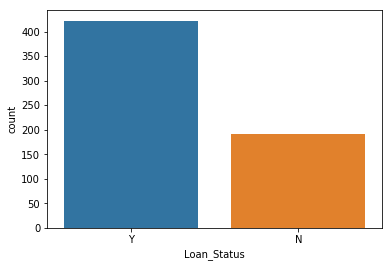

In [12]:
sn.countplot(train.Loan_Status,label='count')
plt.show()

## Independent variables
### univarient analysis

Categorical(Nominal): these are categorical without order or ranking
Categorical(ordinal): these are categorical with order or ranking
Numerical: These have numerical values

## Descriptive statistics

In [13]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [14]:
ApplicantIncome_cv=train['ApplicantIncome'].std()/train['ApplicantIncome'].mean()
CoapplicantIncome_cv=train.CoapplicantIncome.std()/train.CoapplicantIncome.mean()
LoanAmount_cv=train.LoanAmount.std()/train.LoanAmount.mean()
Loan_Amount_Term_cv=train.Loan_Amount_Term.std()/train.Loan_Amount_Term.mean()
Credit_History_cv=train.Credit_History.std()/train.Credit_History.mean()

print("Co efficient of variance of ApplicantIncome:",ApplicantIncome_cv)
print("Co efficient of variance of CoapplicantIncome:",CoapplicantIncome_cv)
print("Co efficient of variance of LoanAmount:",LoanAmount_cv)
print("Co efficient of variance of Loan_Amount_Term:",Loan_Amount_Term_cv)
print("Co efficient of variance of Credit_History:",Credit_History_cv)

Co efficient of variance of ApplicantIncome: 1.1305797551151708
Co efficient of variance of CoapplicantIncome: 1.8049381363301926
Co efficient of variance of LoanAmount: 0.5845643146838528
Co efficient of variance of Loan_Amount_Term: 0.19041055513044608
Co efficient of variance of Credit_History: 0.43324499378806813


# Distribution plots

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


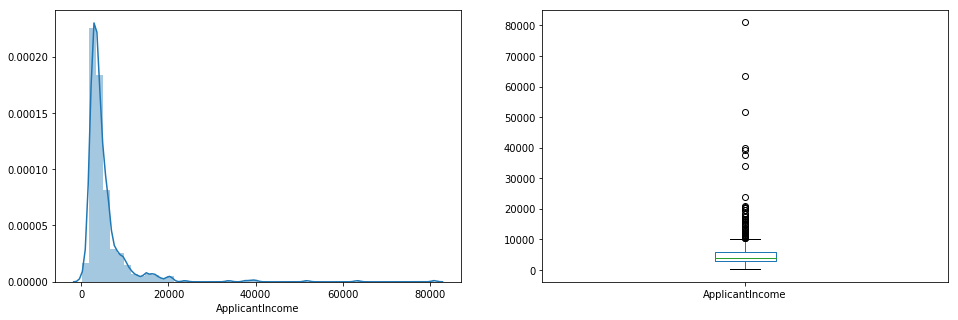

In [15]:
plt.figure(1)
plt.subplot(121)
sn.distplot(train['ApplicantIncome'])

plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))

plt.show()

In [16]:
train.ApplicantIncome.max()

81000

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


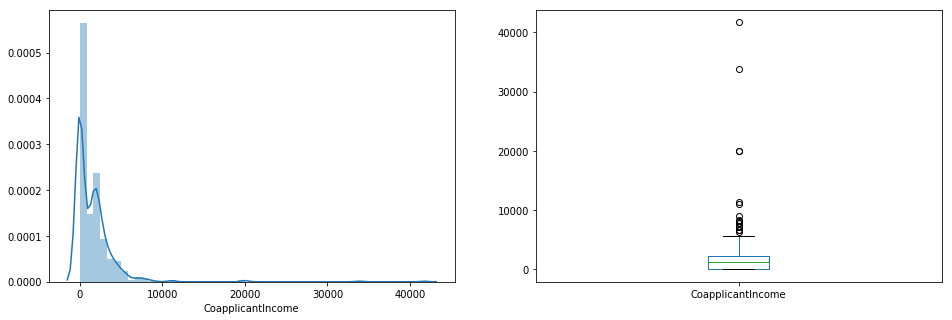

In [17]:
plt.figure(1)
plt.subplot(121)
sn.distplot(train['CoapplicantIncome'])

plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


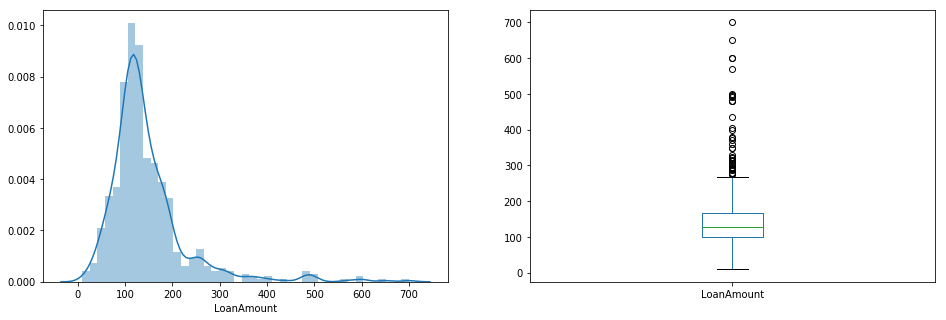

In [18]:
plt.figure(1)

plt.subplot(121)
sn.distplot(train['LoanAmount'].dropna())

plt.subplot(122)
train['LoanAmount'].dropna().plot.box(figsize=(16,5))

plt.show()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


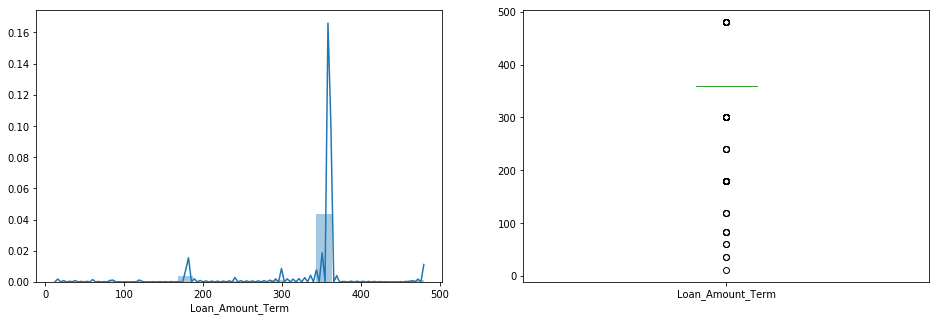

In [19]:
#print(train.Loan_Amount_Term.value_counts())

#plt.figure(1)

#plt.subplot(121)
#sn.distplot(train['Loan_Amount_Term'].dropna())

#plt.subplot(122)
#train['Loan_Amount_Term'].dropna().plot.box(figsize=(16,5))

#plt.show()

print(train['Loan_Amount_Term'].value_counts())

plt.figure(1)
plt.subplot(121)
sn.distplot(train['Loan_Amount_Term'].dropna());

plt.subplot(122)
train['Loan_Amount_Term'].dropna().plot.box(figsize=(16,5))

plt.show();

1.0    475
0.0     89
Name: Credit_History, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


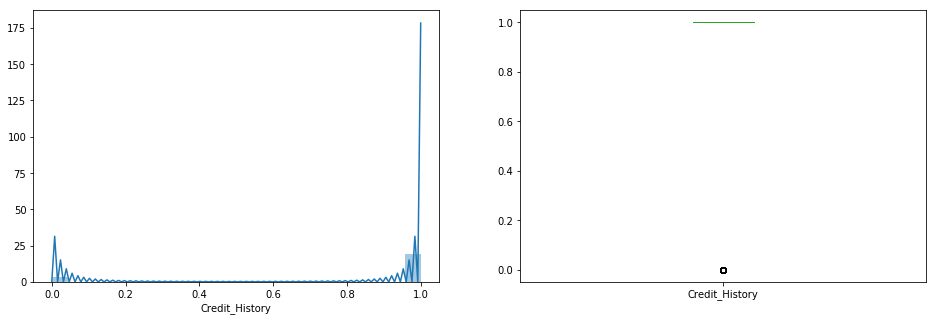

In [20]:
print(train.Credit_History.value_counts())

plt.figure(1)

plt.subplot(121)
sn.distplot(train['Credit_History'].dropna())

plt.subplot(122)
train['Credit_History'].dropna().plot.box(figsize=(16,5))

plt.show()

# Categorical Variables

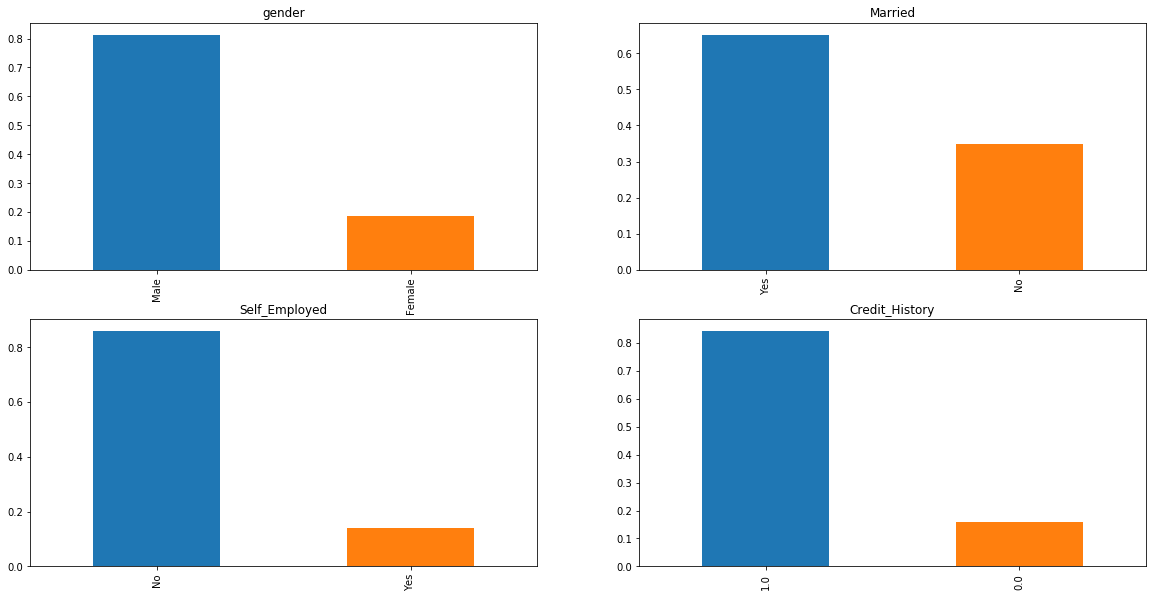

In [21]:
plt.figure(1)

plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='gender')

plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title='Married')

plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')

plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')

plt.show()

# Ordinal Variables

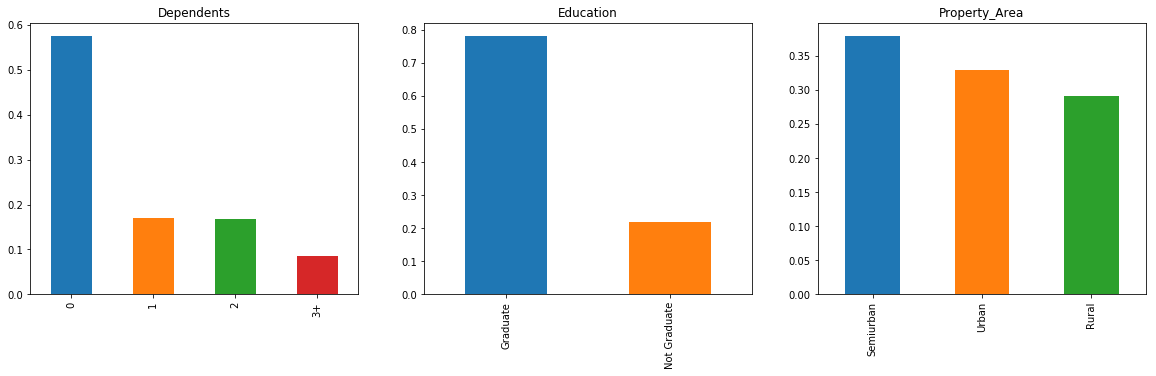

In [22]:
plt.figure(1)

plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(20,5),title='Dependents')

plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title='Education')

plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')

plt.show()

# Bivariate analysis

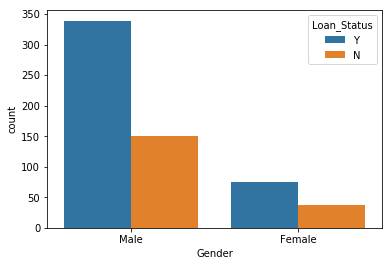

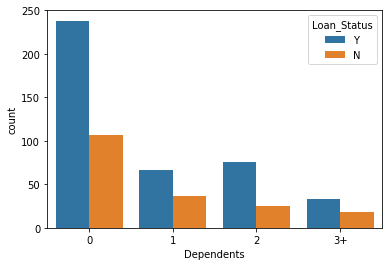

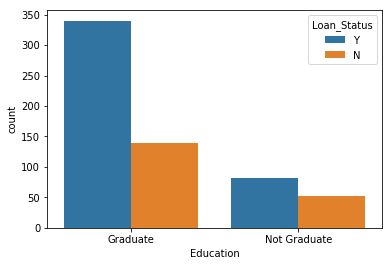

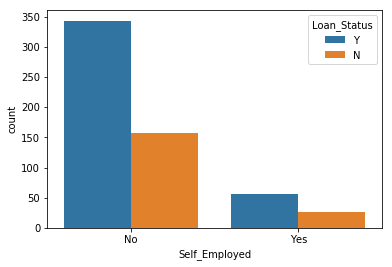

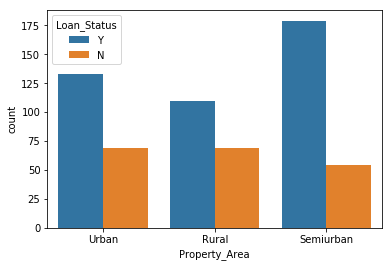

In [23]:
sn.countplot(train['Gender'], hue=train['Loan_Status'])
plt.show()

sn.countplot(train['Dependents'], hue=train['Loan_Status'])
plt.show()

sn.countplot(train['Education'], hue=train['Loan_Status'])
plt.show()

sn.countplot(train['Self_Employed'], hue=train['Loan_Status'])
plt.show()

sn.countplot(train['Property_Area'], hue=train['Loan_Status'])
plt.show()

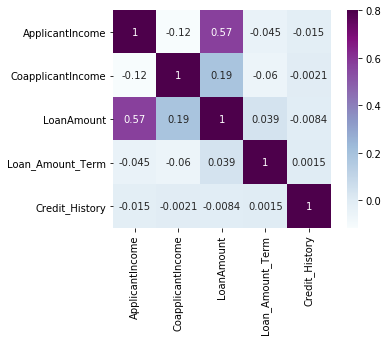

In [24]:

corr_matrix = train[numerical].corr()
#f, ax = plt.subplots(figsize=(9, 6))
sn.heatmap(corr_matrix, vmax=.8, annot=True, square=True, cmap="BuPu");

In [25]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [26]:
train['Gender']=train.Gender.fillna(method='ffill')

In [27]:
train['Married']=train.Married.fillna(method='ffill')

In [28]:
train['Dependents']=train.Dependents.fillna(method='ffill')

In [29]:
train['Self_Employed']=train.Dependents.fillna(method='ffill')

In [30]:
a=train['LoanAmount'].mean()
train['LoanAmount']=train['LoanAmount'].fillna(a)

In [31]:
train['Loan_Amount_Term']=train.Loan_Amount_Term.fillna(method='ffill')

In [32]:
train['Credit_History']=train.Credit_History.fillna(method='ffill')

In [45]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [46]:
train.groupby('Loan_Status').mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
N,5446.078125,1877.807292,150.945488,344.875000,0.546875
Y,5384.068720,1504.516398,144.349606,340.151659,0.966825


In [61]:
dummies=pd.get_dummies(['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status'])
dummies.head(20)

,Dependents,Education,Gender,Loan_Status,Married,Property_Area,Self_Employed
0,0,0,1,0,0,0,0
1,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0
4,0,0,0,0,0,0,1
5,0,0,0,0,0,1,0
6,0,0,0,1,0,0,0


In [62]:
train1=train.drop(['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status'],axis='columns')
train1.head(10)

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,LP001002,5849,0.0,146.412162,360.0,1.0
1,LP001003,4583,1508.0,128.000000,360.0,1.0
2,LP001005,3000,0.0,66.000000,360.0,1.0
3,LP001006,2583,2358.0,120.000000,360.0,1.0
4,LP001008,6000,0.0,141.000000,360.0,1.0
5,LP001011,5417,4196.0,267.000000,360.0,1.0
6,LP001013,2333,1516.0,95.000000,360.0,1.0
7,LP001014,3036,2504.0,158.000000,360.0,0.0
8,LP001018,4006,1526.0,168.000000,360.0,1.0
9,LP001020,12841,10968.0,349.000000,360.0,1.0


In [64]:
dummies.isnull().sum()

Dependents       0
Education        0
Gender           0
Loan_Status      0
Married          0
Property_Area    0
Self_Employed    0
dtype: int64

In [65]:
merged=pd.concat([train1,dummies],axis='columns')
merged.head(10)

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents,Education,Gender,Loan_Status,Married,Property_Area,Self_Employed
0,LP001002,5849,0.0,146.412162,360.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,LP001003,4583,1508.0,128.000000,360.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,LP001005,3000,0.0,66.000000,360.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,LP001006,2583,2358.0,120.000000,360.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,LP001008,6000,0.0,141.000000,360.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,LP001011,5417,4196.0,267.000000,360.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,LP001013,2333,1516.0,95.000000,360.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,LP001014,3036,2504.0,158.000000,360.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,LP001018,4006,1526.0,168.000000,360.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,LP001020,12841,10968.0,349.000000,360.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
final=merged.drop(['Loan_ID','Loan_Status'],axis='columns')
final.head(10)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents,Education,Gender,Married,Property_Area,Self_Employed
0,5849,0.0,146.412162,360.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,4583,1508.0,128.000000,360.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3000,0.0,66.000000,360.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2583,2358.0,120.000000,360.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,6000,0.0,141.000000,360.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5,5417,4196.0,267.000000,360.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6,2333,1516.0,95.000000,360.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,3036,2504.0,158.000000,360.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
8,4006,1526.0,168.000000,360.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
9,12841,10968.0,349.000000,360.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
target=merged['Loan_Status']
target.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Loan_Status, dtype: float64

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(final,target,test_size=0.2)

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [54]:
from sklearn.model_selection import cross_val_score

In [55]:
final.isnull().sum()

ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Dependents           607
Education            607
Gender               607
Married              607
Property_Area        607
Self_Employed        607
dtype: int64

In [57]:
final.Gender

0      1.0
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
6      0.0
7      NaN
8      NaN
9      NaN
10     NaN
11     NaN
12     NaN
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     NaN
19     NaN
20     NaN
21     NaN
22     NaN
23     NaN
24     NaN
25     NaN
26     NaN
27     NaN
28     NaN
29     NaN
      ... 
584    NaN
585    NaN
586    NaN
587    NaN
588    NaN
589    NaN
590    NaN
591    NaN
592    NaN
593    NaN
594    NaN
595    NaN
596    NaN
597    NaN
598    NaN
599    NaN
600    NaN
601    NaN
602    NaN
603    NaN
604    NaN
605    NaN
606    NaN
607    NaN
608    NaN
609    NaN
610    NaN
611    NaN
612    NaN
613    NaN
Name: Gender, Length: 614, dtype: float64

In [43]:
lr=cross_val_score(LogisticRegression(),final,target)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [169]:
from sklearn import linear_model
reg=linear_model.LogisticRegression()

In [164]:
type(target)

pandas.core.series.Series

In [172]:
reg.fit(final,target)

ValueError: could not convert string to float: 'LP002990'